#### Dataset 2
This dataset has been sourced from the following source: United States Environmental Protection Agency [https://www.epa.gov/outdoor-air-quality-data]

Duration: 2016- 2023

This dataset provides estimates of outdoor concentrations for five pollutants (four gases: O3, CO, SO2, NO2; one aerosol: PM2.5) throughout the contiguous U.S. 

We've made API calls to get quarterly summary data for each state and each pollutant and calculated the arithmetic mean for each county in that particular state.

In [56]:
import requests
import pandas as pd

In [57]:
states = {
    "Alabama": "01",
    "Arizona": "04",
    "Arkansas": "05",
    "California": "06",
    "Colorado": "08",
    "Connecticut": "09",
    "Delaware": "10",
    "District of Columbia": "12",
    "Florida": "12",
    "Georgia": "13",
    "Idaho": "16",
    "Illinois": "17",
    "Indiana": "18",
    "Iowa": "19",
    "Kansas": "20",
    "Kentucky": "21",
    "Louisiana": "22",
    "Maine": "23",
    "Maryland": "24",
    "Massachusetts": "25",
    "Michigan": "26",
    "Minnesota": "27",
    "Mississippi": "28",
    "Missouri": "29",
    "Montana": "30",
    "Nebraska": "31",
    "Nevada": "32",
    "New Hampshire": "33",
    "New Jersey": "34",
    "New Mexico": "35",
    "New York": "36",
    "North Carolina": "37",
    "North Dakota": "38",
    "Ohio": "39",
    "Oklahoma": "40",
    "Oregon": "41",
    "Pennsylvania": "42",
    "Rhode Island": "44",
    "South Carolina": "45",
    "South Dakota": "46",
    "Tennessee": "47",
    "Texas": "48",
    "Utah": "49",
    "Vermont": "50",
    "Virginia": "51",
    "Washington": "53",
    "West Virginia": "54",
    "Wisconsin": "55",
    "Wyoming": "56",
}
reversed_states = {value: key for key, value in states.items()}

In [58]:
result = []


def make_row(dataCO, dataNO2, dataSO2, dataO3, dataPM, state, year):
    resCO = []
    resNO2 = []
    resSO2 = []
    resO3 = []
    resPM = []

    for entry in dataCO["Data"]:
        if entry["pollutant_standard"] == "CO 8-hour 1971":
            if entry["arithmetic_mean"]:
                resCO.append(entry["arithmetic_mean"])
    if len(resCO) != 0:
        avgCO = sum(resCO) / len(resCO)
    else:
        avgCO = 0

    for entry in dataNO2["Data"]:
        if entry["pollutant_standard"] == "NO2 Annual 1971":
            if entry["arithmetic_mean"]:
                resNO2.append(entry["arithmetic_mean"])
    if len(resNO2) != 0:
        avgNO2 = sum(resNO2) / len(resNO2)
    else:
        avgNO2 = 0

    for entry in dataSO2["Data"]:
        if (
            entry["pollutant_standard"] == "SO2 24-hour 1971"
            and entry["sample_duration"] == "24-HR BLK AVG"
        ):
            if entry["arithmetic_mean"]:
                resSO2.append(entry["arithmetic_mean"])
    if len(resSO2) != 0:
        avgSO2 = sum(resSO2) / len(resSO2)
    else:
        avgSO2 = 0

    for entry in dataO3["Data"]:
        if entry["pollutant_standard"] == "Ozone 8-Hour 1997":
            if entry["arithmetic_mean"]:
                resO3.append(entry["arithmetic_mean"])

    if len(resO3) != 0:
        avgO3 = sum(resO3) / len(resO3)
    else:
        avgO3 = 0

    for entry in dataPM["Data"]:
        if entry["pollutant_standard"] == "PM25 24-hour 2012":
            if entry["arithmetic_mean"]:
                resPM.append(entry["arithmetic_mean"])

    if len(resPM) != 0:
        avgPM = sum(resPM) / len(resPM)
    else:
        avgPM = 0

    row = {
        "Year": year,
        "State": reversed_states[state],
        "CO": avgCO,
        "NO2": avgNO2,
        "O3": avgO3 * 1000,
        "SO2": avgSO2,
        "PM2.5": avgPM,
    }
    result.append(row)

In [ ]:
def get_data(years, paramaters):



In [59]:
for state in reversed_states:
    dataCO = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42101&bdate=20160101&edate=20160101&state="
        + state
    ).json()
    dataNO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42602&bdate=20160101&edate=20160101&state="
        + state
    ).json()
    dataSO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42401&bdate=20160101&edate=20160101&state="
        + state
    ).json()
    dataO3 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=44201&bdate=20160101&edate=20160101&state="
        + state
    ).json()
    dataPM = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=44201&bdate=20160101&edate=20161231&state="
        + state
    ).json()

    make_row(dataCO, dataNO2, dataSO2, dataO3, dataPM, state, "2016")

In [60]:
for state in reversed_states:
    dataCO = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42101&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataNO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42602&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataSO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42401&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataO3 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=44201&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataPM = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=88101&bdate=20170101&edate=20171231&state="
        + state
    ).json()

    make_row(dataCO, dataNO2, dataSO2, dataO3, dataPM, state, "2017")

In [61]:
for state in reversed_states:
    dataCO = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42101&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataNO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42602&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataSO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42401&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataO3 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=44201&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataPM = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=88101&bdate=20180101&edate=20181231&state="
        + state
    ).json()

    make_row(dataCO, dataNO2, dataSO2, dataO3, dataPM, state, "2018")

In [62]:
for state in reversed_states:
    dataCO = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42101&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataNO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42602&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataSO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42401&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataO3 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=44201&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataPM = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=88101&bdate=20190101&edate=20191231&state="
        + state
    ).json()

    make_row(dataCO, dataNO2, dataSO2, dataO3, dataPM, state, "2019")

In [63]:
for state in reversed_states:
    dataCO = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42101&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataNO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42602&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataSO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42401&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataO3 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=44201&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataPM = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=88101&bdate=20200101&edate=20201231&state="
        + state
    ).json()

    make_row(dataCO, dataNO2, dataSO2, dataO3, dataPM, state, "2020")

In [64]:
for state in reversed_states:
    dataCO = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42101&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataNO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42602&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataSO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42401&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataO3 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=44201&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataPM = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=88101&bdate=20210101&edate=20211231&state="
        + state
    ).json()

    make_row(dataCO, dataNO2, dataSO2, dataO3, dataPM, state, "2021")

In [72]:
for state in reversed_states:
    dataCO = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42101&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataNO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42602&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataSO2 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=42401&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataO3 = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=44201&bdate=20170101&edate=20170101&state="
        + state
    ).json()
    dataPM = requests.get(
        "https://aqs.epa.gov/data/api/annualData/byState?email=ayushee.tbmun@gmail.com&key=cobaltheron43&param=88101&bdate=20220101&edate=20221231&state="
        + state
    ).json()

    make_row(dataCO, dataNO2, dataSO2, dataO3, dataPM, state, "2022")

In [73]:
new_df = pd.DataFrame(result)

In [74]:
new_df

,Year,State,CO,NO2,O3,SO2,PM2.5
0,2016,Alabama,0.335046,11.590768,42.888217,1.084163,8.552241
1,2016,Arizona,0.377550,14.518312,47.042156,2.526001,7.969025
2,2016,Arkansas,0.296619,7.618276,40.615625,1.007651,8.903133
3,2016,California,0.325958,9.466369,43.539671,0.584314,9.236139
4,2016,Colorado,0.359351,11.847951,50.166387,1.390327,6.240495
...,...,...,...,...,...,...,...
331,2022,Virginia,0.268520,7.526997,41.782174,1.723818,6.708522
332,2022,Washington,0.256532,11.773077,38.919071,0.908437,8.416898
333,2022,West Virginia,0.247439,0.000000,40.487900,1.811433,7.542383
334,2022,Wisconsin,0.198281,7.660129,41.186806,0.515683,7.079322


In [75]:
new_df = new_df[new_df["State"] != "Alaska"]
new_df

,Year,State,CO,NO2,O3,SO2,PM2.5
0,2016,Alabama,0.335046,11.590768,42.888217,1.084163,8.552241
1,2016,Arizona,0.377550,14.518312,47.042156,2.526001,7.969025
2,2016,Arkansas,0.296619,7.618276,40.615625,1.007651,8.903133
3,2016,California,0.325958,9.466369,43.539671,0.584314,9.236139
4,2016,Colorado,0.359351,11.847951,50.166387,1.390327,6.240495
...,...,...,...,...,...,...,...
331,2022,Virginia,0.268520,7.526997,41.782174,1.723818,6.708522
332,2022,Washington,0.256532,11.773077,38.919071,0.908437,8.416898
333,2022,West Virginia,0.247439,0.000000,40.487900,1.811433,7.542383
334,2022,Wisconsin,0.198281,7.660129,41.186806,0.515683,7.079322


In [69]:
new_df.to_csv("test_data.csv", index=False)

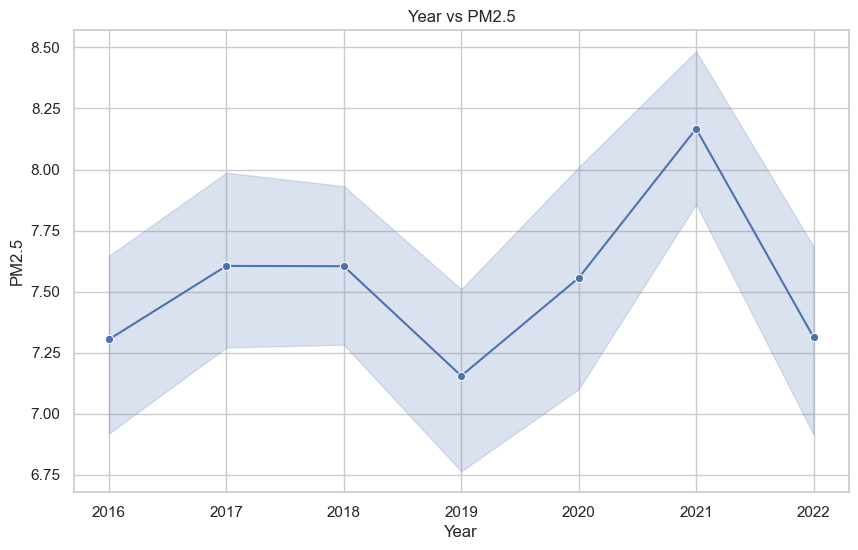

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Set the style (optional)
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
sns.lineplot(x='Year', y='PM2.5', data=new_df, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.title('Year vs PM2.5')

# Show the plot
plt.show()


In [77]:
average_pm25_by_year = new_df.groupby('Year')['PM2.5'].mean()
average_pm25_by_year

Year
2016    7.304784
2017    7.605412
2018    7.604222
2019    7.155359
2020    7.556375
2021    8.167069
2022    7.313604
Name: PM2.5, dtype: float64